# Cluster Analysis

## K-means clustering

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

## Objective Function
he k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

![](img/kmeans.png)

## Intutive Algorithm

The k-means algorithm captures the insight that each point in a cluster should be near to the center of that cluster. It works like this: first we choose k, the number of clusters we want to find in the data. Then, the centers of those k clusters, called centroids, are initialized in some fashion.

The algorithm then proceeds in two alternating parts: In the Reassign Points step, we assign every point in the data to the cluster whose centroid is nearest to it. In the Update Centroids step, we recalculate each centroid's location as the mean (center) of all the points assigned to its cluster. We then iterate these steps until the centroids stop moving, or equivalently until the points stop switching clusters.

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [105]:
import ipywidgets as widgets
from ipywidgets import interact

In [39]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [61]:
n_samples = 1500
random_state = 170

In [74]:
X, y = make_blobs(n_samples=n_samples, random_state=random_state, 
                  cluster_std = 2, centers = 4)

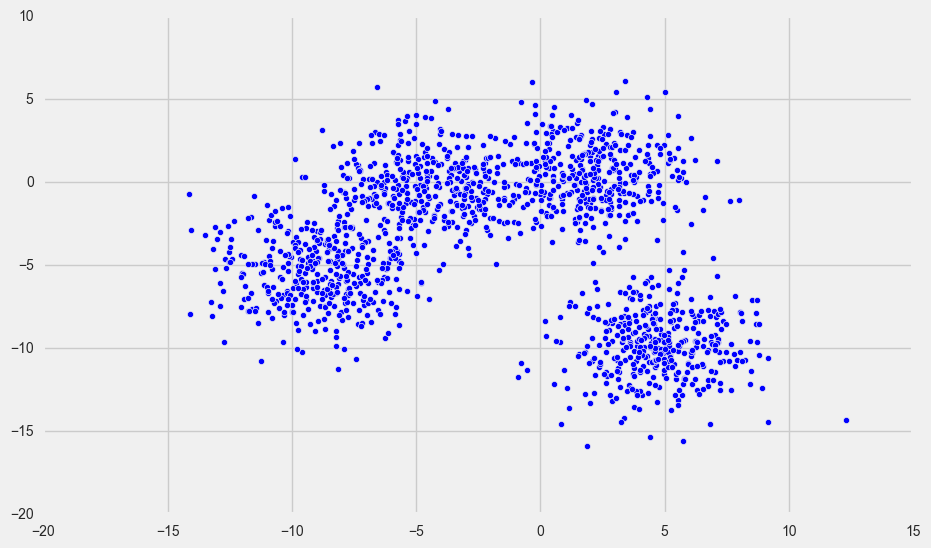

In [75]:
plt.scatter(X[:,0],X[:,1], cmap=plt.cm.viridis)

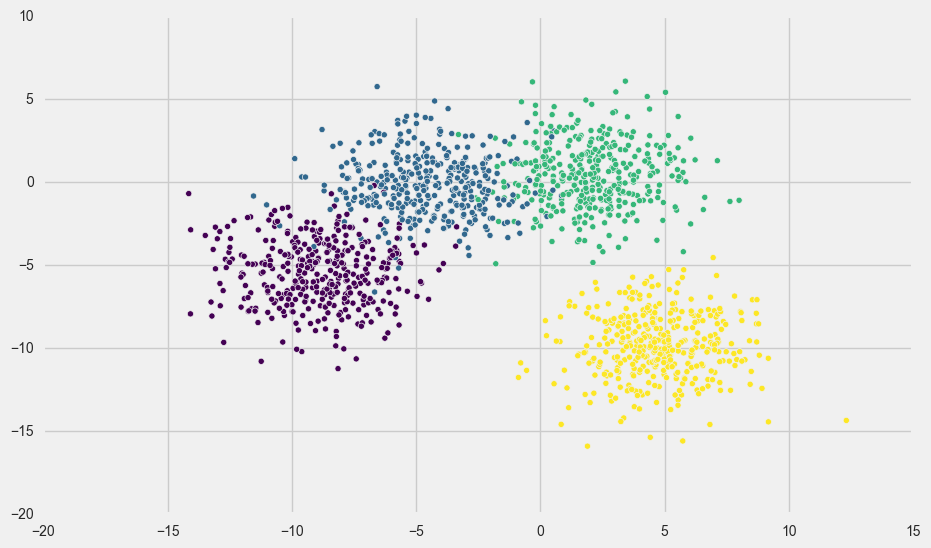

In [125]:
plt.scatter(X[:,0],X[:,1], c = y, cmap=plt.cm.viridis)

In [54]:
KMeans?

In [122]:
def cluster(iters, std):
    
    # Generate blobs
    X, y = make_blobs(n_samples=n_samples, random_state=random_state, 
                  cluster_std = std, centers = 4)
    
    # Run kmeans clustering
    kmeans = KMeans(init='random', n_clusters=4, max_iter= iters, 
                    random_state=random_state, n_init=1)
    kmeans.fit(X)

    # Mesh creation to plot the decision boundary.
    step = .02  
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, step), np.arange(x1_min, x1_max, step))

    # Obtain labels for each point in mesh.
    Z = kmeans.predict(np.c_[xx0.ravel(), xx1.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx0.shape)
    cs = plt.contourf(xx0, xx1, Z, cmap=plt.cm.viridis, alpha = 0.5)
    
    # Plot the original plots
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.magma)

In [123]:
iters_list = widgets.IntSlider(min=1, max=10, step=1, value=1)
std_list = widgets.FloatSlider(min=0.5, max=2.5, step=0.5, value=2)

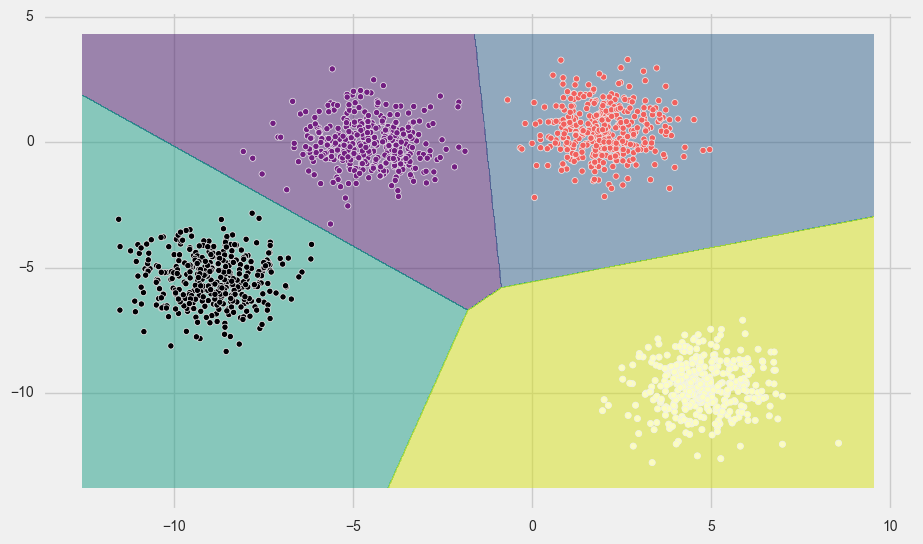

In [124]:
interact(cluster, iters=iters_list, std=std_list)

## Kmeans clustering on cars dataset

Choose two variables as `price` and `kmpl` and run to get 2 clusters for "Hatchback" and "Sedan"

Choose four variables as `price`, `kmpl`, `bhp` and `make` and get 2 clusters for `type`